In [1]:
import torch
import numpy as np
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils import data
import torch.nn.functional as F

import requests
import string
import urllib.request
import urllib.error
from pandas import *

import imageio.v3 as iio
from pathlib import Path
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
from dataset import YTDataset
from cnn import Net

In [3]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
print(device)

cuda


In [5]:
from torch.nn import BCEWithLogitsLoss
from torch.optim import Adam, SGD
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout

# defining the model
model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', pretrained=True)
model.fc = Sequential(
            Linear(512, 128),
            ReLU(),
            Linear(128, 32),
            ReLU(),
            Linear(32, 1)
        )
model.to(device)
#model = Net().to(device)
# defining the optimizer
optimizer = Adam(model.fc.parameters(), lr=1e-5)
# defining the loss function
criterion = BCEWithLogitsLoss()
# checking if GPU is available
if torch.cuda.is_available():
    model = model.cuda()
    criterion = criterion.cuda()
    
#print(model)

Using cache found in /home/weiwei/.cache/torch/hub/pytorch_vision_v0.10.0


In [14]:
## dataset
dataset_path = Path('image_data/')

train_dataset = YTDataset(dataset_path, split='train', is_norm=True)
val_dataset = YTDataset(dataset_path, split='val', is_norm=True)

batch_size = 100
num_epoch = 1000

train_loader = data.DataLoader(train_dataset, batch_size=batch_size, num_workers=16, shuffle=True, drop_last=True)
val_loader = data.DataLoader(val_dataset, batch_size=1, num_workers=16, shuffle=False)

In [15]:
train_loss_list = []
val_loss_list = []
val_accuracy_list = []

for epoch in range(num_epoch):
    model.train()
    running_loss = 0.0
    for inputs, labels, _ in train_loader:
        
        inputs = inputs.to(device, dtype=torch.float)
        labels = labels.to(device, dtype=torch.float)
        
        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    train_loss = running_loss / len(train_loader)
    print(f"Epoch {epoch+1}, Train Loss: {train_loss}")
    train_loss_list.append(train_loss)

    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels, _ in val_loader:
            
            inputs = inputs.to(device, dtype=torch.float)
            labels = labels.to(device, dtype=torch.float)
            
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item()

            predicted = F.sigmoid(outputs.data) >= 0.5
            
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_loss = running_loss / len(val_loader)
    val_accuracy = correct / total
    print(f"Epoch {epoch+1}, Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")
    val_loss_list.append(val_loss)
    val_accuracy_list.append(val_accuracy)

Epoch 1, Train Loss: 0.5058392995879764
Epoch 1, Validation Loss: 0.5216033186661391, Validation Accuracy: 0.7295539033457249
Epoch 2, Train Loss: 0.5023315896590551
Epoch 2, Validation Loss: 0.5211138367768876, Validation Accuracy: 0.7267657992565055
Epoch 3, Train Loss: 0.5045017415568942
Epoch 3, Validation Loss: 0.5206381432031763, Validation Accuracy: 0.7267657992565055
Epoch 4, Train Loss: 0.5034886981759753
Epoch 4, Validation Loss: 0.5199906350438895, Validation Accuracy: 0.7276951672862454
Epoch 5, Train Loss: 0.5041243540389198
Epoch 5, Validation Loss: 0.5236791979173565, Validation Accuracy: 0.724907063197026
Epoch 6, Train Loss: 0.5030518025159836
Epoch 6, Validation Loss: 0.5222326107167372, Validation Accuracy: 0.7276951672862454
Epoch 7, Train Loss: 0.504311095391001
Epoch 7, Validation Loss: 0.5205483891305316, Validation Accuracy: 0.7276951672862454
Epoch 8, Train Loss: 0.5060897221167883
Epoch 8, Validation Loss: 0.52010009894286, Validation Accuracy: 0.7267657992565

Epoch 65, Validation Loss: 0.5092581733619815, Validation Accuracy: 0.7267657992565055
Epoch 66, Train Loss: 0.487285574277242
Epoch 66, Validation Loss: 0.5092365538266913, Validation Accuracy: 0.7286245353159851
Epoch 67, Train Loss: 0.48536959077630726
Epoch 67, Validation Loss: 0.5098309391788397, Validation Accuracy: 0.7267657992565055
Epoch 68, Train Loss: 0.4824942747751872
Epoch 68, Validation Loss: 0.5091330417389479, Validation Accuracy: 0.7276951672862454
Epoch 69, Train Loss: 0.48391908478169215
Epoch 69, Validation Loss: 0.5080754786412159, Validation Accuracy: 0.7286245353159851
Epoch 70, Train Loss: 0.48263188132217955
Epoch 70, Validation Loss: 0.5101281892210522, Validation Accuracy: 0.7295539033457249
Epoch 71, Train Loss: 0.4789666937930243
Epoch 71, Validation Loss: 0.5082898404229377, Validation Accuracy: 0.7286245353159851
Epoch 72, Train Loss: 0.48086758099851157
Epoch 72, Validation Loss: 0.5095906553311329, Validation Accuracy: 0.7295539033457249
Epoch 73, Trai

Epoch 129, Train Loss: 0.4664324734892164
Epoch 129, Validation Loss: 0.5039522987998135, Validation Accuracy: 0.7342007434944238
Epoch 130, Train Loss: 0.4683867579414731
Epoch 130, Validation Loss: 0.5037402147559197, Validation Accuracy: 0.7360594795539034
Epoch 131, Train Loss: 0.4689652692703974
Epoch 131, Validation Loss: 0.5040443507700442, Validation Accuracy: 0.7295539033457249
Epoch 132, Train Loss: 0.46623699012256803
Epoch 132, Validation Loss: 0.5022225305725834, Validation Accuracy: 0.7342007434944238
Epoch 133, Train Loss: 0.4643862886088235
Epoch 133, Validation Loss: 0.5025001590018555, Validation Accuracy: 0.7379182156133829
Epoch 134, Train Loss: 0.46463068964935483
Epoch 134, Validation Loss: 0.5023003196610799, Validation Accuracy: 0.7314126394052045
Epoch 135, Train Loss: 0.46614547144799007
Epoch 135, Validation Loss: 0.5025248231747548, Validation Accuracy: 0.7360594795539034
Epoch 136, Train Loss: 0.4666495245127451
Epoch 136, Validation Loss: 0.503390667922829

Epoch 192, Train Loss: 0.4501078093335742
Epoch 192, Validation Loss: 0.4994762913189996, Validation Accuracy: 0.7434944237918215
Epoch 193, Train Loss: 0.44825927416483563
Epoch 193, Validation Loss: 0.4994062426703208, Validation Accuracy: 0.7434944237918215
Epoch 194, Train Loss: 0.4484673653330122
Epoch 194, Validation Loss: 0.5006450388314839, Validation Accuracy: 0.7425650557620818
Epoch 195, Train Loss: 0.4511972488391967
Epoch 195, Validation Loss: 0.5005462857456203, Validation Accuracy: 0.7425650557620818
Epoch 196, Train Loss: 0.4466927314088458
Epoch 196, Validation Loss: 0.4987780616135504, Validation Accuracy: 0.7425650557620818
Epoch 197, Train Loss: 0.44707299059345607
Epoch 197, Validation Loss: 0.49924899643195314, Validation Accuracy: 0.7453531598513011
Epoch 198, Train Loss: 0.4455490750925882
Epoch 198, Validation Loss: 0.49918267900025953, Validation Accuracy: 0.7397769516728625
Epoch 199, Train Loss: 0.4485793468498048
Epoch 199, Validation Loss: 0.50021697656008

Epoch 255, Train Loss: 0.4344400366147359
Epoch 255, Validation Loss: 0.49678440395587725, Validation Accuracy: 0.7453531598513011
Epoch 256, Train Loss: 0.43255353754475
Epoch 256, Validation Loss: 0.4969670909016997, Validation Accuracy: 0.7444237918215614
Epoch 257, Train Loss: 0.4279634015900748
Epoch 257, Validation Loss: 0.4958361667299818, Validation Accuracy: 0.75
Epoch 258, Train Loss: 0.4313914605549404
Epoch 258, Validation Loss: 0.4966542382572464, Validation Accuracy: 0.7481412639405205
Epoch 259, Train Loss: 0.42881428272951216
Epoch 259, Validation Loss: 0.49564096254400897, Validation Accuracy: 0.7481412639405205
Epoch 260, Train Loss: 0.4296397715806961
Epoch 260, Validation Loss: 0.49658643850417494, Validation Accuracy: 0.7462825278810409
Epoch 261, Train Loss: 0.4293425501812072
Epoch 261, Validation Loss: 0.49563909799845535, Validation Accuracy: 0.7481412639405205
Epoch 262, Train Loss: 0.42931401090962545
Epoch 262, Validation Loss: 0.4985183193412182, Validation

Epoch 319, Train Loss: 0.41317205131053925
Epoch 319, Validation Loss: 0.4951301697336724, Validation Accuracy: 0.7462825278810409
Epoch 320, Train Loss: 0.41689029265017735
Epoch 320, Validation Loss: 0.4936342969255805, Validation Accuracy: 0.7527881040892194
Epoch 321, Train Loss: 0.4133452560220446
Epoch 321, Validation Loss: 0.49604130539525737, Validation Accuracy: 0.7434944237918215
Epoch 322, Train Loss: 0.41373805914606365
Epoch 322, Validation Loss: 0.4942381785249145, Validation Accuracy: 0.7481412639405205
Epoch 323, Train Loss: 0.41009980794929324
Epoch 323, Validation Loss: 0.4935267824673338, Validation Accuracy: 0.7527881040892194
Epoch 324, Train Loss: 0.4122061346258436
Epoch 324, Validation Loss: 0.49389447881803383, Validation Accuracy: 0.75
Epoch 325, Train Loss: 0.4121084915740149
Epoch 325, Validation Loss: 0.49340344660538493, Validation Accuracy: 0.7490706319702602
Epoch 326, Train Loss: 0.41218597903138116
Epoch 326, Validation Loss: 0.4958034188857304, Valida

Epoch 383, Validation Loss: 0.4926978942410061, Validation Accuracy: 0.7518587360594795
Epoch 384, Train Loss: 0.39092016574882327
Epoch 384, Validation Loss: 0.4917039873407263, Validation Accuracy: 0.7509293680297398
Epoch 385, Train Loss: 0.3945287607965015
Epoch 385, Validation Loss: 0.4953190821485761, Validation Accuracy: 0.7472118959107806
Epoch 386, Train Loss: 0.3940229948077883
Epoch 386, Validation Loss: 0.493623781833786, Validation Accuracy: 0.7527881040892194
Epoch 387, Train Loss: 0.38913029574212576
Epoch 387, Validation Loss: 0.49211948600175837, Validation Accuracy: 0.7537174721189591
Epoch 388, Train Loss: 0.39108840340659734
Epoch 388, Validation Loss: 0.4921805214908361, Validation Accuracy: 0.7518587360594795
Epoch 389, Train Loss: 0.39104420088586356
Epoch 389, Validation Loss: 0.4937687589759412, Validation Accuracy: 0.75
Epoch 390, Train Loss: 0.3884353375151044
Epoch 390, Validation Loss: 0.4920111066274121, Validation Accuracy: 0.7509293680297398
Epoch 391, T

Epoch 447, Train Loss: 0.3737401543628602
Epoch 447, Validation Loss: 0.49309836782181926, Validation Accuracy: 0.7537174721189591
Epoch 448, Train Loss: 0.3740876395077932
Epoch 448, Validation Loss: 0.49156297906004387, Validation Accuracy: 0.7518587360594795
Epoch 449, Train Loss: 0.37136962442171007
Epoch 449, Validation Loss: 0.492491976016892, Validation Accuracy: 0.7481412639405205
Epoch 450, Train Loss: 0.3705957077798389
Epoch 450, Validation Loss: 0.4957196832820654, Validation Accuracy: 0.7472118959107806
Epoch 451, Train Loss: 0.37014071501436685
Epoch 451, Validation Loss: 0.4946783484389476, Validation Accuracy: 0.7537174721189591
Epoch 452, Train Loss: 0.3693776322262628
Epoch 452, Validation Loss: 0.49169530833667346, Validation Accuracy: 0.7555762081784386
Epoch 453, Train Loss: 0.36843604984737577
Epoch 453, Validation Loss: 0.49332594234742166, Validation Accuracy: 0.7509293680297398
Epoch 454, Train Loss: 0.36777837574481964
Epoch 454, Validation Loss: 0.49320158359

Epoch 510, Validation Loss: 0.4977732358762756, Validation Accuracy: 0.7481412639405205
Epoch 511, Train Loss: 0.34853169109140125
Epoch 511, Validation Loss: 0.4939494947346207, Validation Accuracy: 0.7518587360594795
Epoch 512, Train Loss: 0.3494955947001775
Epoch 512, Validation Loss: 0.4962628260846539, Validation Accuracy: 0.7462825278810409
Epoch 513, Train Loss: 0.3478395789861679
Epoch 513, Validation Loss: 0.4931044984440054, Validation Accuracy: 0.7537174721189591
Epoch 514, Train Loss: 0.34861168549174354
Epoch 514, Validation Loss: 0.49308003963083086, Validation Accuracy: 0.7546468401486989
Epoch 515, Train Loss: 0.3510599512429464
Epoch 515, Validation Loss: 0.4954578071503291, Validation Accuracy: 0.7509293680297398
Epoch 516, Train Loss: 0.3464236954847972
Epoch 516, Validation Loss: 0.4938481068849499, Validation Accuracy: 0.7574349442379182
Epoch 517, Train Loss: 0.34872094861098696
Epoch 517, Validation Loss: 0.49359904158554313, Validation Accuracy: 0.75557620817843

Epoch 574, Train Loss: 0.32931937206359135
Epoch 574, Validation Loss: 0.49585271499130085, Validation Accuracy: 0.7574349442379182
Epoch 575, Train Loss: 0.3279256976786114
Epoch 575, Validation Loss: 0.49557685833488296, Validation Accuracy: 0.7537174721189591
Epoch 576, Train Loss: 0.32715734981355216
Epoch 576, Validation Loss: 0.49665225636000393, Validation Accuracy: 0.75
Epoch 577, Train Loss: 0.32899724159921917
Epoch 577, Validation Loss: 0.4965467637403555, Validation Accuracy: 0.7509293680297398
Epoch 578, Train Loss: 0.3273021898099354
Epoch 578, Validation Loss: 0.4961077310289406, Validation Accuracy: 0.7574349442379182
Epoch 579, Train Loss: 0.3241132242338998
Epoch 579, Validation Loss: 0.4958470070374041, Validation Accuracy: 0.7537174721189591
Epoch 580, Train Loss: 0.32557861258586246
Epoch 580, Validation Loss: 0.4975049473732894, Validation Accuracy: 0.7527881040892194
Epoch 581, Train Loss: 0.3246369049662635
Epoch 581, Validation Loss: 0.49700091840120836, Valida

Epoch 637, Validation Loss: 0.5000036806859397, Validation Accuracy: 0.7602230483271375
Epoch 638, Train Loss: 0.3056280641328721
Epoch 638, Validation Loss: 0.5036789003807999, Validation Accuracy: 0.7453531598513011
Epoch 639, Train Loss: 0.3062873039217222
Epoch 639, Validation Loss: 0.5011342986503, Validation Accuracy: 0.7527881040892194
Epoch 640, Train Loss: 0.3071391639255342
Epoch 640, Validation Loss: 0.5007726943497168, Validation Accuracy: 0.75
Epoch 641, Train Loss: 0.3052714371255466
Epoch 641, Validation Loss: 0.5033449374094369, Validation Accuracy: 0.7490706319702602
Epoch 642, Train Loss: 0.30373111544620424
Epoch 642, Validation Loss: 0.501709701646793, Validation Accuracy: 0.7518587360594795
Epoch 643, Train Loss: 0.30184133031538557
Epoch 643, Validation Loss: 0.5000440204357361, Validation Accuracy: 0.7546468401486989
Epoch 644, Train Loss: 0.30699155621585394
Epoch 644, Validation Loss: 0.4992318816233393, Validation Accuracy: 0.7518587360594795
Epoch 645, Train 

Epoch 701, Validation Loss: 0.5053044119933076, Validation Accuracy: 0.7555762081784386
Epoch 702, Train Loss: 0.2854776506622632
Epoch 702, Validation Loss: 0.5074403397053262, Validation Accuracy: 0.7509293680297398
Epoch 703, Train Loss: 0.2850812819032442
Epoch 703, Validation Loss: 0.5059051342558393, Validation Accuracy: 0.7555762081784386
Epoch 704, Train Loss: 0.2795753170336996
Epoch 704, Validation Loss: 0.5066828777928304, Validation Accuracy: 0.7509293680297398
Epoch 705, Train Loss: 0.28163174788157147
Epoch 705, Validation Loss: 0.5062394071115353, Validation Accuracy: 0.7546468401486989
Epoch 706, Train Loss: 0.28466335719540004
Epoch 706, Validation Loss: 0.5071964091864096, Validation Accuracy: 0.7518587360594795
Epoch 707, Train Loss: 0.2832324228116444
Epoch 707, Validation Loss: 0.5067621099500157, Validation Accuracy: 0.7546468401486989
Epoch 708, Train Loss: 0.27858502275886987
Epoch 708, Validation Loss: 0.5056366793541096, Validation Accuracy: 0.7555762081784386

Epoch 764, Validation Loss: 0.5122211559383267, Validation Accuracy: 0.7555762081784386
Epoch 765, Train Loss: 0.2648289586816515
Epoch 765, Validation Loss: 0.5130509410637556, Validation Accuracy: 0.7565055762081785
Epoch 766, Train Loss: 0.2630609745780627
Epoch 766, Validation Loss: 0.5152028361210248, Validation Accuracy: 0.7546468401486989
Epoch 767, Train Loss: 0.260658714388098
Epoch 767, Validation Loss: 0.5117399517287554, Validation Accuracy: 0.7565055762081785
Epoch 768, Train Loss: 0.26320698112249374
Epoch 768, Validation Loss: 0.5153287949444236, Validation Accuracy: 0.7527881040892194
Epoch 769, Train Loss: 0.26181728499276297
Epoch 769, Validation Loss: 0.5143230711545682, Validation Accuracy: 0.7527881040892194
Epoch 770, Train Loss: 0.25840360387450173
Epoch 770, Validation Loss: 0.5133108426107102, Validation Accuracy: 0.7555762081784386
Epoch 771, Train Loss: 0.26029622838610694
Epoch 771, Validation Loss: 0.513146316400829, Validation Accuracy: 0.7592936802973977


Epoch 828, Train Loss: 0.24374582653953916
Epoch 828, Validation Loss: 0.5215300605644096, Validation Accuracy: 0.7509293680297398
Epoch 829, Train Loss: 0.24112774076915922
Epoch 829, Validation Loss: 0.5227227949467425, Validation Accuracy: 0.7537174721189591
Epoch 830, Train Loss: 0.2392644782861074
Epoch 830, Validation Loss: 0.5240190995905475, Validation Accuracy: 0.7518587360594795
Epoch 831, Train Loss: 0.23886470674049287
Epoch 831, Validation Loss: 0.52364965984663, Validation Accuracy: 0.7527881040892194
Epoch 832, Train Loss: 0.24105030404669897
Epoch 832, Validation Loss: 0.5231719337433404, Validation Accuracy: 0.7490706319702602
Epoch 833, Train Loss: 0.23847695759364537
Epoch 833, Validation Loss: 0.5226508273134798, Validation Accuracy: 0.7574349442379182
Epoch 834, Train Loss: 0.23798822363217673
Epoch 834, Validation Loss: 0.5233301183693491, Validation Accuracy: 0.7592936802973977
Epoch 835, Train Loss: 0.2404788959594
Epoch 835, Validation Loss: 0.5231094501304139,

Epoch 891, Train Loss: 0.22172862397772924
Epoch 891, Validation Loss: 0.5361684392433993, Validation Accuracy: 0.7509293680297398
Epoch 892, Train Loss: 0.2202049522172837
Epoch 892, Validation Loss: 0.5345380160824096, Validation Accuracy: 0.7546468401486989
Epoch 893, Train Loss: 0.22046356222459249
Epoch 893, Validation Loss: 0.5328200697732697, Validation Accuracy: 0.7555762081784386
Epoch 894, Train Loss: 0.21984833833717166
Epoch 894, Validation Loss: 0.5333915219245098, Validation Accuracy: 0.7555762081784386
Epoch 895, Train Loss: 0.21821261977865583
Epoch 895, Validation Loss: 0.5380596355056134, Validation Accuracy: 0.7518587360594795
Epoch 896, Train Loss: 0.21968179799261547
Epoch 896, Validation Loss: 0.5341547890821079, Validation Accuracy: 0.7407063197026023
Epoch 897, Train Loss: 0.22303310994591033
Epoch 897, Validation Loss: 0.5344069031057268, Validation Accuracy: 0.7481412639405205
Epoch 898, Train Loss: 0.220477265616258
Epoch 898, Validation Loss: 0.5342298945399

Epoch 954, Validation Loss: 0.5446556350937121, Validation Accuracy: 0.7546468401486989
Epoch 955, Train Loss: 0.20010588743856975
Epoch 955, Validation Loss: 0.5452861715684573, Validation Accuracy: 0.75
Epoch 956, Train Loss: 0.19837356039455958
Epoch 956, Validation Loss: 0.5472270554913743, Validation Accuracy: 0.7490706319702602
Epoch 957, Train Loss: 0.19946885818526858
Epoch 957, Validation Loss: 0.543572971048225, Validation Accuracy: 0.7518587360594795
Epoch 958, Train Loss: 0.20132864905255182
Epoch 958, Validation Loss: 0.544905581681106, Validation Accuracy: 0.758364312267658
Epoch 959, Train Loss: 0.1976776829078084
Epoch 959, Validation Loss: 0.5468446199336565, Validation Accuracy: 0.7490706319702602
Epoch 960, Train Loss: 0.19675389180580774
Epoch 960, Validation Loss: 0.5465758643139977, Validation Accuracy: 0.7537174721189591
Epoch 961, Train Loss: 0.19694702291772478
Epoch 961, Validation Loss: 0.5474959621502775, Validation Accuracy: 0.7527881040892194
Epoch 962, Tr

In [9]:
def plot_metrics(train_loss, val_loss, val_acc):
    epochs = range(1, len(train_loss) + 1)

    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

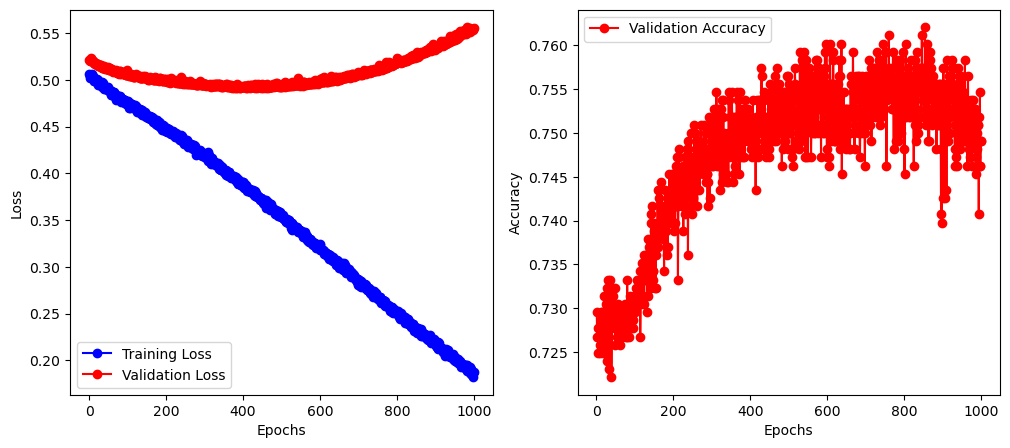

In [16]:
plot_metrics(train_loss_list, val_loss_list, val_accuracy_list)